### NON SATURATING ACTIVATION FUNCTIONS

+ List of Activation Function available in keras is given below.

*WHAT IS DYING RELU*

+ during training, some neurons effectively die.
+ they stop outputting anything otherthan 0.
+ when this happens, gradient descent does not affect anymore
+ It will not work properly

*LEAKY RELU*

+ to solve the above problem.
+ the activation function we use is called leaky relu.
+ leaky relu always outperfomed the strict RELU function.

*ELU - Exponential Linear Unit*

+ ELU outperformed all the ReLU variants.
+ Training time was Reduced.
+ Neural Networks Performed better on the Test Sets.

*SELU - scaled Variant of ELU*

+ scaled variant of ELU

*BACTH NORMALIZATION*

+ Batch Normalization is also used to Improve the Model.
+ By eliminating the Vanishing Gradient and Exploding Gradient Problems.
+ It is done by adding Batch Normalization layers before and after the Activation function layer.

Sometimes applying BN before the activation function works better (there's a debate on this topic). Moreover, the layer before a BatchNormalization layer does not need to have bias terms, since the BatchNormalization layer has some as well, it would be a waste of parameters, so you can set use_bias=False when creating those layers:

`model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])`

*GRADIENT CLIPPING*

+ method to solve exploding gradient.
+ this is done by clipping the gradient descent.
+ so that they never exceeds some threshold.
+ this technique is more used in RNNs.
+ Batch Normalization is tricky to use in RNN.

In [15]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [12]:
activation_functions = [act_fun for act_fun in dir(keras.activations) if not act_fun.startswith("_")]
activation_functions

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

**LEAKY RELU**

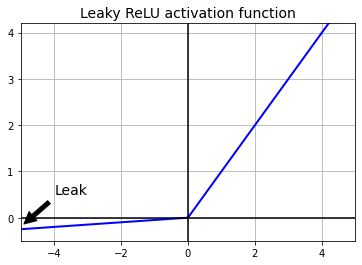

In [17]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

## plot the leaky relu
z = np.linspace(-5, 5, 200)
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

In [30]:
## implementing the leaky relu activation function in the model
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

print("=================MODEL DEVELOPMENT================")
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

print("=================COMPILE THE MODEL=================")
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

print("=================TRAIN THE MODEL===================")
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid, y_valid))

(55000, 28, 28)
(55000,)
(5000, 28, 28)
(5000,)
(10000, 28, 28)
(10000,)
=================MODEL DEVELOPMENT================
=================COMPILE THE MODEL=================
=================TRAIN THE MODEL===================
Epoch 1/10
1719/1719 [==============================] - 5s 2ms/step - loss: 1.3056 - accuracy: 0.6056 - val_loss: 0.8839 - val_accuracy: 0.7196
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7913 - accuracy: 0.7447 - val_loss: 0.7069 - val_accuracy: 0.7680
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6750 - accuracy: 0.7797 - val_loss: 0.6379 - val_accuracy: 0.7928
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6158 - accuracy: 0.7970 - val_loss: 0.5861 - val_accuracy: 0.8084
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5783 - accuracy: 0.8082 - val_loss: 0.5555 - val_accuracy: 0.8188
Epoch 6/10
1719/1719 [==============================

TRYING THE PRELU ACTIVATION FUNCTION

In [31]:
print("=================MODEL DEVELOPMENT================")
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

print("=================COMPILE THE MODEL=================")
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

print("=================TRAIN THE MODEL===================")
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid, y_valid))

=================MODEL DEVELOPMENT================
=================COMPILE THE MODEL=================
=================TRAIN THE MODEL===================
Epoch 1/10
1719/1719 [==============================] - 5s 2ms/step - loss: 1.3627 - accuracy: 0.5800 - val_loss: 0.9319 - val_accuracy: 0.6922
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8341 - accuracy: 0.7254 - val_loss: 0.7449 - val_accuracy: 0.7558
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7099 - accuracy: 0.7721 - val_loss: 0.6689 - val_accuracy: 0.7872
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6426 - accuracy: 0.7921 - val_loss: 0.6076 - val_accuracy: 0.8034
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5983 - accuracy: 0.8039 - val_loss: 0.5703 - val_accuracy: 0.8146
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5663 - accuracy: 0.8121 - val_loss: 0.5437 - va

**ELU - Exponential Linear Unit**

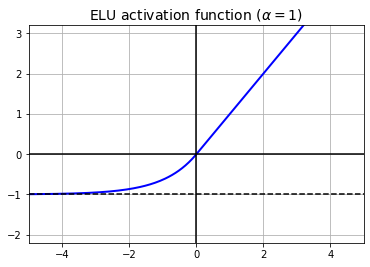

In [33]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

## plotting the ELU
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [36]:
## implementing methods for ELU
keras.layers.Dense(10, activation="elu")

print("=================MODEL DEVELOPMENT================")
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

print("=================COMPILE THE MODEL=================")
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

print("=================TRAIN THE MODEL===================")
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid, y_valid))

=================MODEL DEVELOPMENT================
=================COMPILE THE MODEL=================
=================TRAIN THE MODEL===================
Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.3846 - accuracy: 0.5888 - val_loss: 0.9273 - val_accuracy: 0.7146
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.8223 - accuracy: 0.7429 - val_loss: 0.7238 - val_accuracy: 0.7690
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6929 - accuracy: 0.7785 - val_loss: 0.6482 - val_accuracy: 0.7866
Epoch 4/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.6277 - accuracy: 0.7978 - val_loss: 0.5921 - val_accuracy: 0.8070
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5862 - accuracy: 0.8090 - val_loss: 0.5582 - val_accuracy: 0.8212
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5566 - accuracy: 0.8166 - val_loss: 0.5338 - va

**SELU - scaled Variant of ELU**

In [53]:
print("=================MODEL DEVELOPMENT========================")
## implementing selu activation function
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
## defining selu activation function
model.add(keras.layers.Dense(300, activation="selu",kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",kernel_initializer="lecun_normal"))
## final layer using softmax activation function itself
model.add(keras.layers.Dense(10, activation="softmax"))

print("=================COMPILE THE MODEL=========================")
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

print("=================TRAIN THE MODEL===========================")
## Now let's train it. Do not forget to scale the inputs to mean 0 and standard deviation 1:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

## train the model
history = model.fit(X_train_scaled, y_train, epochs=10,validation_data=(X_valid_scaled, y_valid))

=================MODEL DEVELOPMENT========================
=================COMPILE THE MODEL=========================
=================TRAIN THE MODEL===========================
Epoch 1/10
1719/1719 [==============================] - 25s 13ms/step - loss: 1.1694 - accuracy: 0.5669 - val_loss: 1.0183 - val_accuracy: 0.6178
Epoch 2/10
1719/1719 [==============================] - 20s 12ms/step - loss: 0.7604 - accuracy: 0.7282 - val_loss: 0.6138 - val_accuracy: 0.7796
Epoch 3/10
1719/1719 [==============================] - 21s 12ms/step - loss: 0.6048 - accuracy: 0.7853 - val_loss: 0.5561 - val_accuracy: 0.8052
Epoch 4/10
1719/1719 [==============================] - 21s 12ms/step - loss: 0.5504 - accuracy: 0.8074 - val_loss: 0.5273 - val_accuracy: 0.8192
Epoch 5/10
1719/1719 [==============================] - 21s 12ms/step - loss: 0.5004 - accuracy: 0.8266 - val_loss: 0.4854 - val_accuracy: 0.8330
Epoch 6/10
1719/1719 [==============================] - 21s 12ms/step - loss: 0.4722 - accu

In [54]:
print("=================MODEL DEVELOPMENT========================")
## implementing selu activation function
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
## defining selu activation function
model.add(keras.layers.Dense(300, activation="relu",kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu",kernel_initializer="he_normal"))
## final layer using softmax activation function itself
model.add(keras.layers.Dense(10, activation="softmax"))

print("=================COMPILE THE MODEL=========================")
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

print("=================TRAIN THE MODEL===========================")
## train the model
history = model.fit(X_train_scaled, y_train, epochs=10,validation_data=(X_valid_scaled, y_valid))

=================MODEL DEVELOPMENT========================
=================COMPILE THE MODEL=========================
=================TRAIN THE MODEL===========================
Epoch 1/10
1719/1719 [==============================] - 21s 10ms/step - loss: 2.0168 - accuracy: 0.2048 - val_loss: 2.1770 - val_accuracy: 0.1158
Epoch 2/10
1719/1719 [==============================] - 17s 10ms/step - loss: 1.4604 - accuracy: 0.3866 - val_loss: 1.1570 - val_accuracy: 0.5318
Epoch 3/10
1719/1719 [==============================] - 17s 10ms/step - loss: 1.1557 - accuracy: 0.5152 - val_loss: 0.9410 - val_accuracy: 0.6008
Epoch 4/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.9652 - accuracy: 0.5973 - val_loss: 0.8563 - val_accuracy: 0.6508
Epoch 5/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.8648 - accuracy: 0.6523 - val_loss: 0.8450 - val_accuracy: 0.6418
Epoch 6/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.8639 - accu

HERE WE ARE SUFFERING FROM VANISHING OR EXPLODING GRADIENT PROBLEM

#### BATCH NORMALIZATION

In [59]:
print("=====================MODEL DEVELOPMENT=========================")
## trying the batch normalization in simple terms
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

print(model.summary())
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

print("=====================COMPILE THE MODEL==========================")
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

print("=====================TRAIN THE MODEL============================")
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid, y_valid))

=====================MODEL DEVELOPMENT=========================
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_12 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_336 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_13 (Bat  (None, 300)              1200      
 chNormalization)                                                
                                                                 
 dense_337 (Dense)           (None, 100)               30100     
                                                       

In [60]:
## different method for batch normalization
print("=====================MODEL DEVELOPMENT=========================")
## trying the batch normalization in simple terms
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

print(model.summary())
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

print("=====================COMPILE THE MODEL==========================")
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

print("=====================TRAIN THE MODEL============================")
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid, y_valid))

=====================MODEL DEVELOPMENT=========================
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_15 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_339 (Dense)           (None, 300)               235200    
                                                                 
 batch_normalization_16 (Bat  (None, 300)              1200      
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 300)               0         
                                                       

#### GRADIENT CLIPPING

+ `optimizer = keras.optimizers.SGD(clipvalue=1.0)`
+ `optimizer = keras.optimizers.SGD(clipnorm=1.0)`

In [61]:
## different method for batch normalization
print("=====================MODEL DEVELOPMENT=========================")
## trying the batch normalization in simple terms
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

print(model.summary())
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

print("=====================COMPILE THE MODEL==========================")
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3, clipvalue=1.0),
              metrics=["accuracy"])

print("=====================TRAIN THE MODEL============================")
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid, y_valid))

=====================MODEL DEVELOPMENT=========================
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_18 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_342 (Dense)           (None, 300)               235200    
                                                                 
 batch_normalization_19 (Bat  (None, 300)              1200      
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 300)               0         
                                                       

***